In [1]:
import umap
from sklearn.datasets import load_digits
import os
import glob
import numpy as np
import nibabel as nii
import math
import operator
#import patch_extraction
from scipy.ndimage.interpolation import zoom
from keras.models import load_model
from scipy import ndimage
import scipy.io as sio
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
import csv
list_all=[]
for i in range(25):
    
    with open('cluster_'+str(i)+'.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)
        list_all=list_all+your_list

In [3]:
import pickle
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
a=load_obj('cluster25')

In [6]:
#a.keys()

In [7]:
#np.where(your_list[:,1]=='good')

In [1]:
your_list

NameError: name 'your_list' is not defined

In [6]:
for j in range(0,25):
    with open('cluster_'+str(j)+'.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)
    your_list=np.array(your_list)
    listaT1 = np.array(a['cluster_t1_'+str(j)])[your_list[:,1]=='good']
    listaFLAIR = np.array(a['cluster_flair_'+str(j)])[your_list[:,1]=='good']
    listaLAB = np.array(a['cluster_listaMASK_'+str(j)])[your_list[:,1]=='good']
    listaMASK = np.array(a['cluster_listaLAB_'+str(j)])[your_list[:,1]=='good']
    numfiles=listaT1.size
    subsmapling=32
    
    
    for i in range(0,numfiles):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load('lib/Training/'+listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            
            FLAIR_img = nii.load('lib/Training/'+listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load('lib/Training/'+listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load('lib/Training/'+listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            FLAIR[FLAIR >= 300.0]=300.0
            T1[T1 >= 300.0]=300.0
            
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR=(FLAIR-m1)/s1

            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 and j==0):
                T1andFLAIRlist=T1andFLAIR

            else:
                T1andFLAIRlist=np.concatenate((T1andFLAIRlist,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

/home/reda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/reda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/reda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/reda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/reda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/reda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/home/reda/anaconda3/lib/python3.7/site-pa

In [12]:
#indbg[0].shape
#T1andFLAIRlist_

In [147]:
Mean_flair_=[]
Std_flair_=[]
Mean_t1_=[]
Std_t1_=[]

listaT1 = sorted(glob.glob("lib/MSSEG2016/n_mfmni*T1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/MSSEG2016/n_mfmni*FLAIR*.nii*"))
listaLAB = sorted(glob.glob("lib/MSSEG2016/mni*Consensus.nii*"))
listaMASK = sorted(glob.glob("lib/MSSEG2016/mask_n_mfmni*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            LAB_img = nii.load(listaLAB[i])
            LAB=LAB_img.get_data()
            LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300

            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1
            Mean_t1_.append(m1)
            Std_t1_.append(s1)

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])
            Mean_flair_.append(m1)
            Std_flair_.append(s1)
            FLAIR=(FLAIR-m1)/s1
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_=T1andFLAIR

            else:
                T1andFLAIRlist_=np.concatenate((T1andFLAIRlist_,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [152]:
Mean_flair__=[]
Std_flair__=[]
Mean_t1__=[]
Std_t1__=[]

listaT1 = sorted(glob.glob("lib/ISBI2015/DLB*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/ISBI2015/DLB*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/ISBI2015/DLB*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/ISBI2015/DLB*mask*.nii*"))


for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1
            Mean_t1__.append(m1)
            Std_t1__.append(s1)

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])
            Mean_flair__.append(m1)
            Std_flair__.append(s1)
            FLAIR=(FLAIR-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist__=T1andFLAIR

            else:
                T1andFLAIRlist__=np.concatenate((T1andFLAIRlist__,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [135]:
    with open('cluster_'+str(5)+'.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)
    your_list=np.array(your_list)
    listaT1 = np.array(a['cluster_t1_'+str(5)])[your_list[:,1]=='good']
    listaFLAIR = np.array(a['cluster_flair_'+str(5)])[your_list[:,1]=='good']
    listaMASK= np.array(a['cluster_listaMASK_'+str(5)])[your_list[:,1]=='good']
    listaLAB = np.array(a['cluster_listaLAB_'+str(5)])[your_list[:,1]=='good']
    numfiles=listaT1.size
    subsmapling=8

In [136]:
            i=22
            T1_img = nii.load('lib/Training/'+listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            
            FLAIR_img = nii.load('lib/Training/'+listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load('lib/Training/'+listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load('lib/Training/'+listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            
            
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.min(T1[ind])
            s1=np.max(T1[ind])
            T1=(T1-m1)/(s1-m1)
            
            FLAIR[indbg] = 0
            m1=np.min(T1[ind])
            s1=np.max(T1[ind])
            FLAIR=(FLAIR-m1)/(s1-m1)

            
            """
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1
            
            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR=(FLAIR-m1)/s1

            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]

            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR=(FLAIR-m1)/s1
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]

            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            """
            

'\nind=np.where(MASK>0)\nindbg=np.where(MASK==0)\nT1[indbg] = 0\nm1=np.mean(T1[ind])\ns1=np.std(T1[ind])\nT1=(T1-m1)/s1\n\nFLAIR[indbg] = 0\nm1=np.mean(FLAIR[ind])\ns1=np.std(FLAIR[ind])\n\nFLAIR=(FLAIR-m1)/s1\n\nMASK= MASK[::subsmapling,::subsmapling,::subsmapling]\nT1= T1[::subsmapling,::subsmapling,::subsmapling]\nFLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]\n\nind=np.where(MASK>0)\nindbg=np.where(MASK==0)\nT1[indbg] = 0\nm1=np.mean(T1[ind])\ns1=np.std(T1[ind])\nT1=(T1-m1)/s1\n\nFLAIR[indbg] = 0\nm1=np.mean(FLAIR[ind])\ns1=np.std(FLAIR[ind])\n\nFLAIR=(FLAIR-m1)/s1\nT1= T1[::subsmapling,::subsmapling,::subsmapling]\nFLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]\n\nFLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))\nT1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))\nT1andFLAIR=np.concatenate((T1,FLAIR),axis=4)\nT1andFLAIR=T1andFLAIR.reshape((1,-1))\n'

In [137]:
img = nii.Nifti1Image(T1, np.eye(4))
img.to_filename('T1minmax.nii.gz')

In [138]:
img = nii.Nifti1Image(FLAIR, np.eye(4))
img.to_filename('FLAIRminmax.nii.gz')

In [129]:
T1.mean()

97.1916

In [254]:
FLAIR[::subsmapling,::subsmapling,::subsmapling].astype('int').reshape((-1)).max()

-7

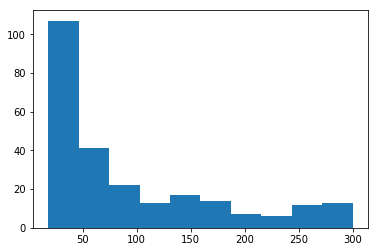

In [45]:

#num_bins = 300
n, bins, patches = plt.hist(T1[::subsmapling,::subsmapling,::subsmapling].astype('int').reshape((-1)))
plt.show()

In [34]:
T1andFLAIRlistt.shape

(1930, 504)

In [11]:
T1andFLAIRlistt=T1andFLAIRlist[~np.isnan(T1andFLAIRlist).any(axis=1)]
#T1andFLAIRlistt=T1andFLAIRlistt[np.isfinite(T1andFLAIRlistt).any(axis=1)]
#T1andFLAIRlist__=T1andFLAIRlist__[~np.isfinite(T1andFLAIRlist__).any(axis=1)]

In [19]:
T1andFLAIRlistt=np.concatenate((T1andFLAIRlistt[:488,:],T1andFLAIRlistt[489:,:]),axis=0)

In [18]:
T1andFLAIRlistt[488,:]

array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -i

In [20]:
np.where(~np.isfinite(T1andFLAIRlistt))

(array([], dtype=int64), array([], dtype=int64))

In [61]:
#alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32')),axis=0)
#ind1=np.random.permutation(alldata.shape[0])
#alldata=alldata[ind1,:]
import time

start = time.time()
reducer = umap.UMAP(n_neighbors=2000, min_dist= 1.0).fit(T1andFLAIRlistt)
end = time.time()
print(end - start)


/home/reda/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


15.362792015075684


In [59]:
alldata.shape

(1987, 504)

In [39]:
alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32')),axis=0)
#ind1=np.random.permutation(alldata.shape[0])

In [40]:
labels=np.concatenate((np.ones(1930),np.ones(15)*2,np.ones(42)*3))
#labels=labels[ind1]


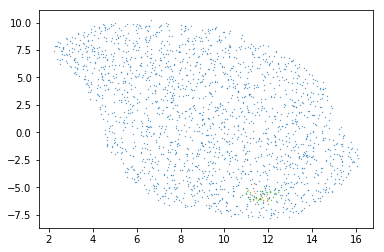

In [62]:
            plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s=0.1, cmap='Spectral')
            plt.scatter(reducer.transform(T1andFLAIRlist_)[:,0],reducer.transform(T1andFLAIRlist_)[:,1], s=0.1, cmap='Spectral')
            plt.scatter(reducer.transform(T1andFLAIRlist__)[:,0],reducer.transform(T1andFLAIRlist__)[:,1], s=0.1, cmap='Spectral')
            plt.show()

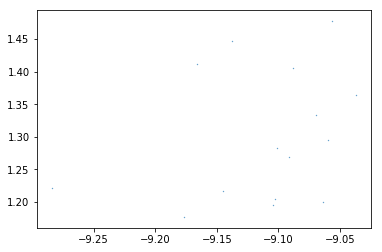

In [38]:
plt.scatter(reducer.transform(T1andFLAIRlist_)[:,0],reducer.transform(T1andFLAIRlist_)[:,1], s=0.1, cmap='Spectral')

In [36]:
i=reducer.transform(T1andFLAIRlist_)

In [37]:
i

array([[-9.14509  ,  1.2172759],
       [-9.137294 ,  1.4464839],
       [-9.104606 ,  1.1953918],
       [-9.059417 ,  1.2945479],
       [-9.103021 ,  1.2051891],
       [-9.087923 ,  1.4061329],
       [-9.069818 ,  1.3338107],
       [-9.1664295,  1.4119076],
       [-9.056771 ,  1.47823  ],
       [-9.037281 ,  1.3637154],
       [-9.283624 ,  1.2215484],
       [-9.100915 ,  1.283227 ],
       [-9.091163 ,  1.2682819],
       [-9.063575 ,  1.1997887],
       [-9.176569 ,  1.176201 ]], dtype=float32)

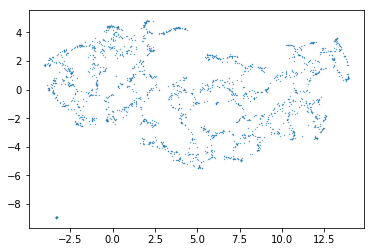

In [29]:
plt.scatter(reducer.embedding_[labels==1,0], reducer.embedding_[labels==1,1], s=0.1, cmap='Spectral')

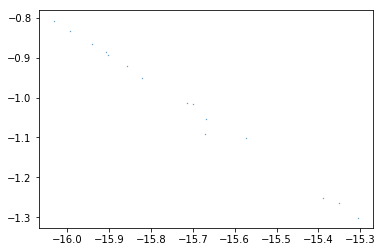

In [30]:
plt.scatter(reducer.embedding_[labels==2,0], reducer.embedding_[labels==2,1], s=0.1, cmap='Spectral')

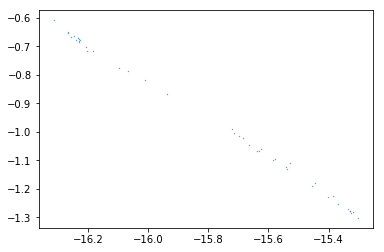

In [31]:
plt.scatter(reducer.embedding_[labels==3,0], reducer.embedding_[labels==3,1], s=0.1, cmap='Spectral')

In [69]:
labels

array([1., 1., 1., ..., 3., 3., 3.])

In [64]:
#alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32')),axis=0)
#ind1=np.random.permutation(alldata.shape[0])
#alldata=alldata[ind1,:]
import time

start = time.time()
reducer = umap.UMAP(n_neighbors=2000, min_dist= 1.0).fit(alldata[:,252:])
end = time.time()
print(end - start)


/home/reda/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


15.603255033493042


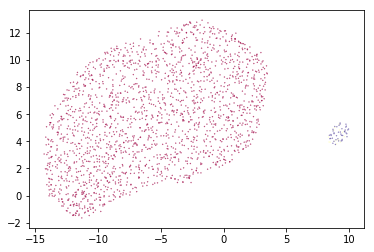

In [74]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=0.1,c=labels+5, cmap='Spectral')

In [75]:
import time

start = time.time()
reducer = umap.UMAP(n_neighbors=2000, min_dist= 1.0).fit(alldata[:,:252])
end = time.time()
print(end - start)


/home/reda/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


17.286317348480225


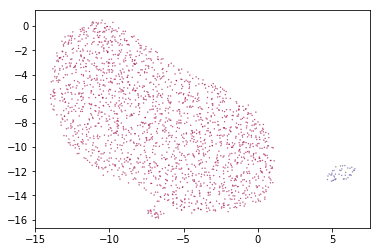

In [76]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=0.1,c=labels, cmap='Spectral')

In [77]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB*mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR=(FLAIR-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X=T1andFLAIR

            else:
                T1andFLAIRlist_X=np.concatenate((T1andFLAIRlist_X,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [79]:
alldata_X=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_X.astype('float32')))
#ind1=np.random.permutation(alldata.shape[0])
#alldata=alldata[ind1,:]
import time

start = time.time()
reducer = umap.UMAP(n_neighbors=2000, min_dist= 1.0).fit(alldata_X)
end = time.time()
print(end - start)

20.281949281692505


In [81]:
labels=np.concatenate((np.ones(1930),np.ones(T1andFLAIRlist_X.shape[0])*2))


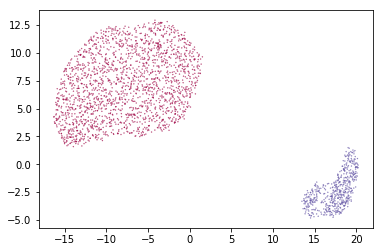

In [82]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=0.1,c=labels, cmap='Spectral')

In [133]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB*mask*.nii*"))
#listaT1 =[ x for x in listaT1 if "flip" not in x ]
#listaFLAIR =[ x for x in listaFLAIR if "flip" not in x ]
#listaLAB =[ x for x in listaLAB if "flip" not in x ]
#listaMASK =[ x for x in listaMASK if "flip" not in x ]

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR=(FLAIR-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X=T1andFLAIR

            else:
                T1andFLAIRlist_X=np.concatenate((T1andFLAIRlist_X,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [140]:
#T1andFLAIRlist_X

In [85]:
alldata_X=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_X.astype('float32')))
#ind1=np.random.permutation(alldata.shape[0])
#alldata=alldata[ind1,:]
import time

start = time.time()
reducer = umap.UMAP(n_neighbors=2000, min_dist= 1.0).fit(alldata_X)
end = time.time()
print(end - start)

17.58502435684204


In [86]:
labels=np.concatenate((np.ones(1930),np.ones(T1andFLAIRlist_X.shape[0])*2))


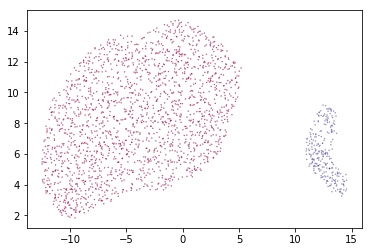

In [87]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=0.1,c=labels, cmap='Spectral')

In [153]:
alldata_X_=np.concatenate((T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32'),T1andFLAIRlist_X.astype('float32')))
#ind1=np.random.permutation(alldata.shape[0])
#alldata=alldata[ind1,:]
import time

start = time.time()
reducer = umap.UMAP().fit(alldata_X_)
end = time.time()
print(end - start)

0.8508763313293457


In [154]:
labels=np.concatenate((np.ones(T1andFLAIRlist_.shape[0]),np.ones(T1andFLAIRlist__.shape[0])*3,np.ones(T1andFLAIRlist_X.shape[0])*2))


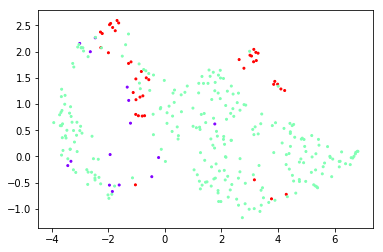

In [155]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=4,c=labels, cmap='rainbow')

In [155]:
# Mean_flair=[]
# Std_flair=[]
# Mean_t1=[]
# Std_t1=[]
# for j in range(0,25):
#     with open('cluster_'+str(j)+'.csv', 'r') as f:
#         reader = csv.reader(f)
#         your_list = list(reader)
#     your_list=np.array(your_list)
#     listaT1 = np.array(a['cluster_t1_'+str(j)])[your_list[:,1]=='good']
#     listaFLAIR = np.array(a['cluster_flair_'+str(j)])[your_list[:,1]=='good']
#     listaLAB = np.array(a['cluster_listaMASK_'+str(j)])[your_list[:,1]=='good']
#     listaMASK = np.array(a['cluster_listaLAB_'+str(j)])[your_list[:,1]=='good']
#     numfiles=listaT1.size
#     subsmapling=32
    
    
#     for i in range(0,numfiles):
#         #print(" ")
#         #print("Images")
#         #print(str(i+1))
#         #		print(listaT1[i])
#         #		print(listaFLAIR[i])
#         #		print(listaMASK[i])
#         #		print(listaLAB[i])
#         try:

#             T1_img = nii.load('lib/Training/'+listaT1[i])
#             T1=T1_img.get_data()
#             T1=T1.astype('float32')
            
#             FLAIR_img = nii.load('lib/Training/'+listaFLAIR[i])
#             FLAIR=FLAIR_img.get_data()
#             FLAIR=FLAIR.astype('float32')
#             #LAB_img = nii.load('lib/Training/'+listaLAB[i])
#             #LAB=LAB_img.get_data()
#             #LAB=LAB.astype('int')
            
#             MASK_img = nii.load('lib/Training/'+listaMASK[i])
#             MASK = MASK_img.get_data()
#             MASK=MASK.astype('int')
            

#             FLAIR[FLAIR >= 300.0]=300.0
#             T1[T1 >= 300.0]=300.0
#             FLAIR[FLAIR < 0]=0
#             T1[T1 < 0]=0
            
#             ind=np.where(MASK>0)
#             indbg=np.where(MASK==0)
#             T1[indbg] = 0
#             m1=np.mean(T1[ind])
#             s1=np.std(T1[ind])
#             Mean_t1.append(m1)
#             Std_t1.append(s1)
#             T1=(T1-m1)/s1

#             FLAIR[indbg] = 0
#             m1=np.mean(FLAIR[ind])
#             s1=np.std(FLAIR[ind])
#             Mean_flair.append(m1)
#             Std_flair.append(s1)
#             FLAIR=(FLAIR-m1)/s1

#             MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
#             T1= T1[::subsmapling,::subsmapling,::subsmapling]
#             FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
#             FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
#             T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
#             T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
#             T1andFLAIR=T1andFLAIR.reshape((1,-1))
#             if(i==0 and j==0):
#                 T1andFLAIRlist=T1andFLAIR

#             else:
#                 T1andFLAIRlist=np.concatenate((T1andFLAIRlist,T1andFLAIR),axis=0)
#         except:
#             print('problem sample n°: '+str(i))
#             continue

In [106]:
T1andFLAIRlistt=T1andFLAIRlist[~np.isnan(T1andFLAIRlist).any(axis=1)]
T1andFLAIRlistt=T1andFLAIRlistt[np.isfinite(T1andFLAIRlistt).any(axis=1)]

In [109]:
#np.where(~np.isfinite(T1andFLAIRlistt))
T1andFLAIRlistt=np.concatenate((T1andFLAIRlistt[:344,:],T1andFLAIRlistt[345:,:]),axis=0)

In [110]:
alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32')))
#ind1=np.random.permutation(alldata.shape[0])
#alldata=alldata[ind1,:]
import time

start = time.time()
reducer = umap.UMAP(n_neighbors=2000, min_dist= 1.0).fit(alldata)
end = time.time()
print(end - start)

/home/reda/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


16.167227745056152


In [113]:
labels=np.concatenate((np.ones(T1andFLAIRlistt.shape[0])*2,np.ones(T1andFLAIRlist_.shape[0]),np.ones(T1andFLAIRlist__.shape[0])*3))


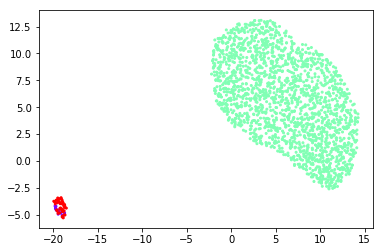

In [114]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=4,c=labels, cmap='rainbow')

In [119]:
Mean_t1=np.array(Mean_t1)
Mean_flair=np.array(Mean_flair)
Std_t1=np.array(Std_t1)
Std_flair=np.array(Std_flair)

Mean_t1_=np.array(Mean_t1_)
Mean_flair_=np.array(Mean_flair_)
Std_t1_=np.array(Std_t1_)
Std_flair_=np.array(Std_flair_)

In [ ]:
#ISBI

In [153]:
plt.scatter(range(Mean_t1.size),Mean_t1,s=1)
plt.scatter(np.array(range(Mean_t1_.size))*int(Mean_t1.size/Mean_t1_.size),Mean_t1_,s=4)
plt.show()

NameError: name 'Mean_t1' is not defined

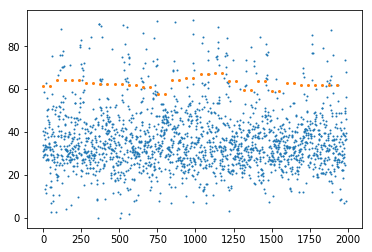

In [144]:
plt.scatter(range(Std_t1.size),Std_t1,s=1)
plt.scatter(np.array(range(Std_t1_.size))*int(Std_t1.size/Std_t1_.size),Std_t1_,s=4)
plt.show()

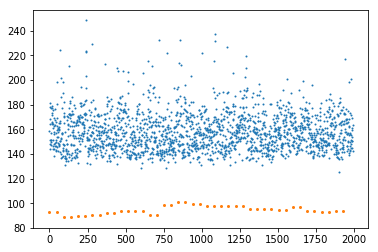

In [145]:
plt.scatter(range(Mean_flair.size),Mean_flair,s=1)
plt.scatter(np.array(range(Mean_flair_.size))*int(Mean_flair.size/Mean_flair_.size),Mean_flair_,s=4)
plt.show()

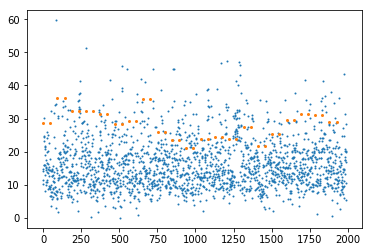

In [146]:
plt.scatter(range(Std_flair.size),Std_flair,s=1)
plt.scatter(np.array(range(Std_flair_.size))*int(Std_flair.size/Std_flair_.size),Std_flair_,s=4)
plt.show()

In [ ]:
#MSSEG

In [148]:
Mean_t1_=np.array(Mean_t1_)
Mean_flair_=np.array(Mean_flair_)
Std_t1_=np.array(Std_t1_)
Std_flair_=np.array(Std_flair_)

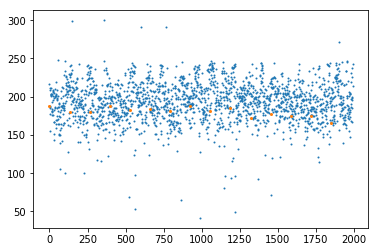

In [149]:
plt.scatter(range(Mean_t1.size),Mean_t1,s=1)
plt.scatter(np.array(range(Mean_t1_.size))*int(Mean_t1.size/Mean_t1_.size),Mean_t1_,s=4)
plt.show()

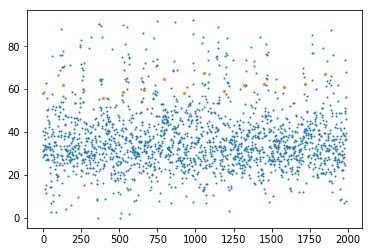

In [150]:
plt.scatter(range(Std_t1.size),Std_t1,s=1)
plt.scatter(np.array(range(Std_t1_.size))*int(Std_t1.size/Std_t1_.size),Std_t1_,s=4)
plt.show()

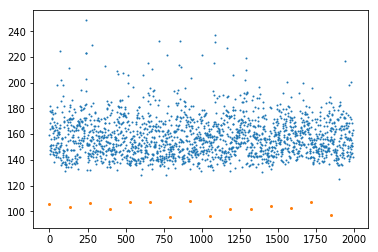

In [151]:
plt.scatter(range(Mean_flair.size),Mean_flair,s=1)
plt.scatter(np.array(range(Mean_flair_.size))*int(Mean_flair.size/Mean_flair_.size),Mean_flair_,s=4)
plt.show()

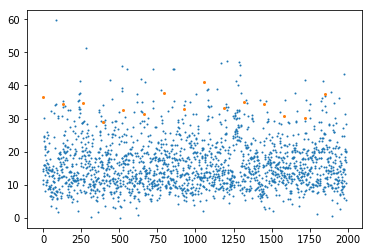

In [152]:
plt.scatter(range(Std_flair.size),Std_flair,s=1)
plt.scatter(np.array(range(Std_flair_.size))*int(Std_flair.size/Std_flair_.size),Std_flair_,s=4)
plt.show()

In [ ]:
np.where(Mean_flair>240)

In [217]:
#minMax

In [5]:
subsmapling=8

In [7]:
import csv

In [154]:
#

In [168]:
M_T1=[]
M_FLAIR=[]
S_T1=[]
S_FLAIR=[]
for j in range(0,25):
    with open('cluster_'+str(j)+'.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)
    your_list=np.array(your_list)
    listaT1 = np.array(a['cluster_t1_'+str(j)])[your_list[:,1]=='good']
    listaFLAIR = np.array(a['cluster_flair_'+str(j)])[your_list[:,1]=='good']
    listaMASK = np.array(a['cluster_listaMASK_'+str(j)])[your_list[:,1]=='good']
    listaLAB = np.array(a['cluster_listaLAB_'+str(j)])[your_list[:,1]=='good']
    numfiles=listaT1.size
    #subsmapling=32
    
    
    for i in range(0,numfiles):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load('lib/Training/'+listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            
            FLAIR_img = nii.load('lib/Training/'+listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load('lib/Training/'+listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load('lib/Training/'+listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1
            M_T1.append(m1)
            S_T1.append(s1)
            
            FLAIR[indbg] = 0
            m2=np.mean(FLAIR[ind])
            s2=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m2)/s2
            M_FLAIR.append(m2)
            S_FLAIR.append(s2)
            
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 and j==0):
                T1andFLAIRlist=T1andFLAIR

            else:
                T1andFLAIRlist=np.concatenate((T1andFLAIRlist,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [ ]:
# listaT1 = sorted(glob.glob("lib/Training_expert/DLB*t1*.nii*"))
# listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB*flair*.nii*"))
# listaLAB = sorted(glob.glob("lib/Training_expert/DLB*lesion*.nii*"))
# listaMASK = sorted(glob.glob("lib/Training_expert/DLB*mask*.nii*"))

# for i in range(0,len(listaT1)):
#         #print(" ")
#         #print("Images")
#         #print(str(i+1))
#         #		print(listaT1[i])
#         #		print(listaFLAIR[i])
#         #		print(listaMASK[i])
#         #		print(listaLAB[i])
#         try:

#             T1_img = nii.load(listaT1[i])
#             T1=T1_img.get_data()
#             T1=T1.astype('float32')
#             FLAIR_img = nii.load(listaFLAIR[i])
#             FLAIR=FLAIR_img.get_data()
#             FLAIR=FLAIR.astype('float32')
#             #LAB_img = nii.load(listaLAB[i])
#             #LAB=LAB_img.get_data()
#             #LAB=LAB.astype('int')
            
#             MASK_img = nii.load(listaMASK[i])
#             MASK = MASK_img.get_data()
#             MASK=MASK.astype('int')
            

            
#             FLAIR[FLAIR >= 300]=300
#             T1[T1 >= 300]=300
            
#             ind=np.where(MASK>0)
#             indbg=np.where(MASK==0)
#             T1[indbg] = 0
#             m1=np.mean(T1[ind])
#             s1=np.std(T1[ind])
#             T1[ind]=(T1[ind]-m1)/s1

#             FLAIR[indbg] = 0
#             m1=np.mean(FLAIR[ind])
#             s1=np.std(FLAIR[ind])

#             FLAIR[ind]=(FLAIR[ind]-m1)/s1
#             #T1= T1[::subsmapling,::subsmapling,::subsmapling]
#             #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
#             MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
#             T1= T1[::subsmapling,::subsmapling,::subsmapling]
#             FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
#             FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
#             T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
#             T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
#             T1andFLAIR=T1andFLAIR.reshape((1,-1))
#             if(i==0 ):
#                 T1andFLAIRlist_X=T1andFLAIR

#             else:
#                 T1andFLAIRlist_X=np.concatenate((T1andFLAIRlist_X,T1andFLAIR),axis=0)
#         except:
#             print('problem sample n°: '+str(i))
#             continue

In [175]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB_AD*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB_AD*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB_AD*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB_AD*mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X_AD=T1andFLAIR

            else:
                T1andFLAIRlist_X_AD=np.concatenate((T1andFLAIRlist_X_AD,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [176]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB_MS_O*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB_MS_O*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB_MS_O*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB_MS_O*mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X_MS_O=T1andFLAIR

            else:
                T1andFLAIRlist_X_MS_O=np.concatenate((T1andFLAIRlist_X_MS_O,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [177]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB_MS_P*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB_MS_P*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB_MS_P*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB_MS_P*mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X_MS_P=T1andFLAIR

            else:
                T1andFLAIRlist_X_MS_P=np.concatenate((T1andFLAIRlist_X_MS_P,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [178]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB_MS_X*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB_MS_X*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB_MS_X*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB_MS_X*mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X_MS_X=T1andFLAIR

            else:
                T1andFLAIRlist_X_MS_X=np.concatenate((T1andFLAIRlist_X_MS_X,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [179]:
listaT1 = sorted(glob.glob("lib/Training_expert/DLB_XX_P*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/Training_expert/DLB_XX_P*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/Training_expert/DLB_XX_P*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/Training_expert/DLB_XX_P*mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            
            FLAIR[FLAIR >= 300]=300
            T1[T1 >= 300]=300
            
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m1)/s1
            #T1= T1[::subsmapling,::subsmapling,::subsmapling]
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_X_XX_P=T1andFLAIR

            else:
                T1andFLAIRlist_X_XX_P=np.concatenate((T1andFLAIRlist_X_XX_P,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [169]:
listaT1 = sorted(glob.glob("lib/ISBI2015/DLB*t1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/ISBI2015/DLB*flair*.nii*"))
listaLAB = sorted(glob.glob("lib/ISBI2015/DLB*lesion*.nii*"))
listaMASK = sorted(glob.glob("lib/ISBI2015/DLB*mask*.nii*"))

M_T1__=[]
M_FLAIR__=[]
S_T1__=[]
S_FLAIR__=[]
for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

  
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m2=np.mean(FLAIR[ind])
            s2=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m2)/s2
            M_T1__.append(m1)
            M_FLAIR__.append(m2)
            S_T1__.append(s1)
            S_FLAIR__.append(s2)
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist__=T1andFLAIR

            else:
                T1andFLAIRlist__=np.concatenate((T1andFLAIRlist__,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [170]:
listaT1 = sorted(glob.glob("lib/MSSEG2016/n_mfmni*T1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/MSSEG2016/n_mfmni*FLAIR*.nii*"))
#listaLAB = sorted(glob.glob("lib/MSSEG2016/mni*Consensus.nii*"))
listaMASK = sorted(glob.glob("lib/MSSEG2016/mask*.nii*"))

M_T1_=[]
M_FLAIR_=[]
S_T1_=[]
S_FLAIR_=[]

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1[ind]=(T1[ind]-m1)/s1

            FLAIR[indbg] = 0
            m2=np.mean(FLAIR[ind])
            s2=np.std(FLAIR[ind])

            FLAIR[ind]=(FLAIR[ind]-m2)/s2

            M_T1_.append(m1)
            M_FLAIR_.append(m2)
            S_T1_.append(s1)
            S_FLAIR_.append(s2)
            
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_=T1andFLAIR

            else:
                T1andFLAIRlist_=np.concatenate((T1andFLAIRlist_,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [89]:
np.min(T1andFLAIRlist__)

0.0

In [104]:
T1andFLAIRlistt=T1andFLAIRlist[~np.isnan(T1andFLAIRlist).any(axis=1)]
T1andFLAIRlistt=T1andFLAIRlistt[np.isfinite(T1andFLAIRlistt).any(axis=1)]

In [174]:
np.save('T1andFLAIRlistmean.npy',T1andFLAIRlist)

In [158]:
np.save('T1_median.npy',M_T1)

In [159]:
np.save('FLAIR_median.npy',M_FLAIR)

In [160]:
np.save('T1_std.npy',S_T1)

In [161]:
np.save('FLAIR_std.npy',S_FLAIR)

In [64]:
            T1_img = nii.load('t1.nii')
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load('flair.nii')
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load('mask.nii')
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

  
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0

            T1[indbg] = 0
            minn=np.min(T1[ind])
            maxx=np.max(T1[ind])
            T1=(T1-minn)/(maxx-minn)

            FLAIR[indbg] = 0
            minn=np.min(FLAIR[ind])
            maxx=np.max(FLAIR[ind])

            FLAIR=(FLAIR-minn)/(maxx-minn)
            #FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))

In [180]:
#alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32'),T1andFLAIRlist_X.astype('float32')))
#alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32')))
alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32'),T1andFLAIRlist__.astype('float32'),T1andFLAIRlist_X_AD.astype('float32'),T1andFLAIRlist_X_MS_O.astype('float32'),T1andFLAIRlist_X_MS_P.astype('float32'),T1andFLAIRlist_X_MS_X.astype('float32'),T1andFLAIRlist_X_XX_P.astype('float32')))

import time

start = time.time()
reducer = umap.UMAP().fit(alldata)
end = time.time()
print(end - start)

/home/reda/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


7.768767356872559


In [238]:
#labels=np.concatenate((np.ones(T1andFLAIRlistt.shape[0])*2,np.ones(T1andFLAIRlist_.shape[0])*1,np.ones(T1andFLAIRlist__.shape[0])*3,np.ones(T1andFLAIRlist_X.shape[0])*4))
labels=np.concatenate((np.ones(T1andFLAIRlistt.shape[0])*0,np.ones(T1andFLAIRlist_.shape[0])*1,np.ones(T1andFLAIRlist__.shape[0])*2,np.ones(T1andFLAIRlist_X_AD.shape[0])*3,np.ones(T1andFLAIRlist_X_MS_O.shape[0])*4,np.ones(T1andFLAIRlist_X_MS_P.shape[0])*5,np.ones(T1andFLAIRlist_X_MS_X.shape[0])*6,np.ones(T1andFLAIRlist_X_XX_P.shape[0])*7))

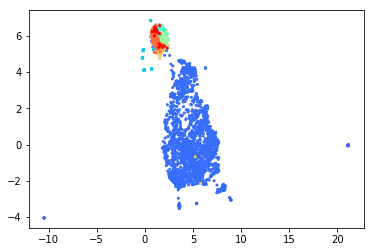

In [228]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=4,c=labels, cmap='rainbow')

In [223]:
labels.astype(int).astype(str)

array(['2', '2', '2', ..., '8', '8', '8'], dtype='<U21')

In [224]:
#np.concatenate((np.ones(T1andFLAIRlistt.shape[0])*2,np.ones(T1andFLAIRlist_.shape[0])*1,np.ones(T1andFLAIRlist__.shape[0])*3,np.ones(T1andFLAIRlist_X_AD.shape[0])*4,np.ones(T1andFLAIRlist_X_MS_O.shape[0])*5,np.ones(T1andFLAIRlist_X_MS_P.shape[0])*6,np.ones(T1andFLAIRlist_X_MS_X.shape[0])*7,np.ones(T1andFLAIRlist_X_XX_P.shape[0])*8))
labels= [",".join(item) for item in labels.astype(int).astype(str)]
labels[labels=='2']='volbrain'
labels_string[labels_string=='1']='msseg'
labels_string[labels_string=='3']='isbi'

labels_string[labels_string=='4']='AD'
labels_string[labels_string=='5']='MS_O'
labels_string[labels_string=='6']='MS_P'
labels_string[labels_string=='7']='MS_X'
llabels_string[labels_string=='8']='MS_XX_P'

TypeError: 'str' object does not support item assignment

In [240]:
import matplotlib

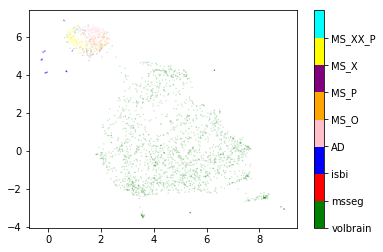

In [247]:
vis=np.concatenate((reducer.embedding_,labels.reshape((-1,1))),axis=1)
red_vis=vis[(vis[:,0]<10 ) * (vis[:,0]>-2.5),:]

tick = ['volbrain','msseg','isbi','AD','MS_O','MS_P','MS_X','MS_XX_P']
colors = ['green','red','blue','pink','orange','purple','yellow','aqua']

plt.scatter(   red_vis [:,0], red_vis [:,1], s=0.01,c=red_vis [:,2].astype(int), cmap=matplotlib.colors.ListedColormap(colors))
#plt.colorbar()


cb = plt.colorbar()
loc = np.arange(0,max(red_vis [:,2].astype(int)),max(red_vis [:,2].astype(int))/float(len(tick)))
cb.set_ticks(loc)
cb.set_ticklabels(tick)
plt.savefig('destination_path.eps', format='eps')

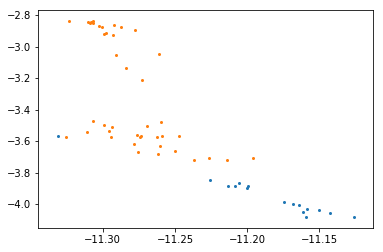

In [167]:
plt.scatter(reducer.embedding_[labels==1,:][:,0], reducer.embedding_[labels==1,:][:,1], s=4, cmap='rainbow')
plt.scatter(reducer.embedding_[labels==3,:][:,0], reducer.embedding_[labels==3,:][:,1], s=4, cmap='rainbow')
#plt.scatter(reducer.embedding_[labels==4,:][:,0], reducer.embedding_[labels==4,:][:,1], s=4, cmap='rainbow')
plt.show()

In [38]:
np.std(alldata)

4.432584

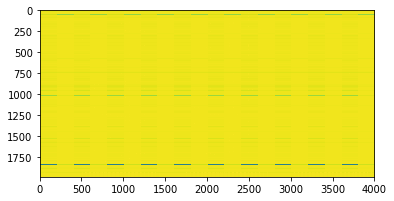

In [51]:
plt.imshow(alldata[:,10000:14000])

In [45]:
T1andFLAIRlist__.shape

(42, 29624)

In [46]:
T1andFLAIRlist_.shape

(16, 29624)

In [47]:
T1andFLAIRlistt.shape

(1931, 29624)

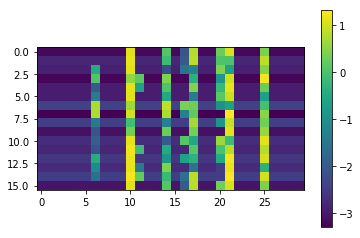

In [127]:
plt.imshow(T1andFLAIRlist_[:,::1000])
plt.colorbar()
plt.show()

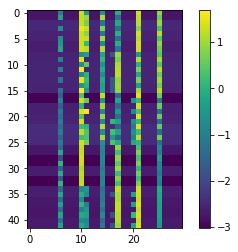

In [126]:
plt.imshow(T1andFLAIRlist__[:,::1000])
plt.colorbar()
plt.show()

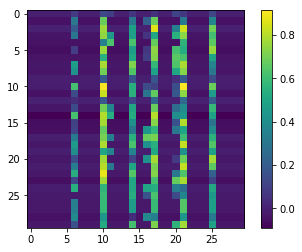

In [123]:
plt.imshow(T1andFLAIRlistt[1030:1060,::1000])
plt.colorbar()
plt.show()

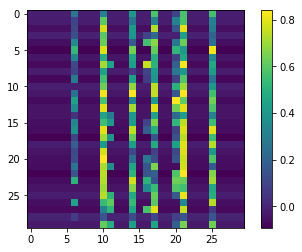

In [124]:
plt.imshow(T1andFLAIRlistt[1130:1160,::1000])
plt.colorbar()
plt.show()

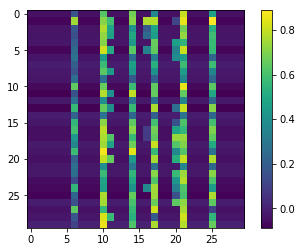

In [125]:
plt.imshow(T1andFLAIRlistt[1230:1260,::1000])
plt.colorbar()
plt.show()

In [ ]:
plt.scatter(reducer.embedding_[labels==1,:][:,0], reducer.embedding_[labels==1,:][:,1], s=4, cmap='rainbow')

In [55]:
np.sqrt(29624)

172.11623979160132

In [56]:
A=np.mean(T1andFLAIRlistt,axis=0)[:172*172].reshape((172,172))

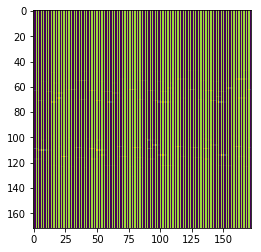

In [57]:
plt.imshow(A)

In [59]:
B=np.mean(T1andFLAIRlist_,axis=0)[:172*172].reshape((172,172))

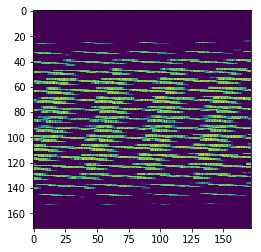

In [61]:
plt.imshow(B)

In [60]:
C=np.mean(T1andFLAIRlist__,axis=0)[:172*172].reshape((172,172))

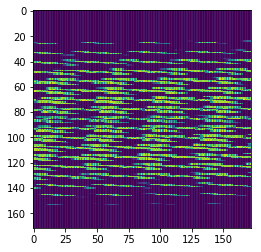

In [62]:
plt.imshow(C)

In [28]:
for i in np.mean(T1andFLAIRlistt,axis=0):
    print (i)

-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5531716

-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5531716

-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5525764
-1.9059783
-0.55224437
-1.9056296
-0.55294085
-1.9060743
-0.55317163
-1.906791
-0.55228806
-1.9050987
-0.55207264
-1.9053491
-0.5523991
-1.9054877
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55274653
-1.9064217
-0.5523073
-1.9057099
-0.55272543
-1.9063437
-0.55317163
-1.906791
-0.5527857
-1.9063834
-0.55032045
-1.9035078
-0.54909307
-1.901198
-0.550147
-1.9027227
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.9

-0.53507024
-1.8754053
-0.5307109
-1.8666534
-0.51590765
-1.8582108
-0.4719922
-1.7905792
-0.48353535
-1.804258
-0.5450243
-1.8965099
-0.5520137
-1.9044025
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5506644
-1.9044657
-0.5009087
-1.8262556
-0.4849361
-1.8018721
-0.49901742
-1.8282773
-0.54126984
-1.8909738
-0.5523271
-1.9050834
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.553

-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5525969
-1.9062903
-0.55284977
-1.9060115
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55266154
-1.9065604
-0.55236804
-1.9057766
-0.55264276
-1.9066195
-0.5527148
-1.9066131
-0.5527019
-1.9060673
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906

-1.8982534
-0.5527899
-1.9053165
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5520799
-1.90554
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5513424
-1.9046003
-0.5460257
-1.8968943
-0.510575
-1.8434608
-0.47178704
-1.7933993
-0.5286249
-1.8773265
-0.5489481
-1.8997785
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5526135
-1.9058123
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.54702824
-1.89816
-0.54241127
-1.8911921
-0.5118364
-1.8490297
-0.5096684
-1.8498455
-0.52588034
-1.8750488


-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.5531716

-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791
-0.55317163
-1.906791


In [29]:
for i in np.mean(T1andFLAIRlist_,axis=0):
    print (i)

-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.

-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2

-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2

-2.854078
-2.8100922
-2.5327246
-2.6816368
-0.55903137
-0.1247488
0.14172095
0.50263405
0.036146242
0.5955478
-1.2763726
-0.83709514
-1.3154731
-1.0260404
-0.555457
0.4188527
0.20654686
0.56874084
0.7464401
-0.071657635
0.009174708
0.34085077
0.3183343
0.2612823
-0.15387015
0.14159918
-0.72141534
-0.48315677
-2.418172
-2.65967
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.7873256
-2.7871504
-1.4320277
-1.1281505
-1.2695861
-1.0359627
-0.16653341
-0.097772755
0.30905476
0.05542621
-0.12739293
0.27909178
0.71845156
0.2009393
0.73125625
0.16795263
0.14688793
0.32608697
0.12612721
0.4593437
-0.59270835
-0.23909502
-1.9548397
-2.2158372
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.8

1.1155857
0.1319753
0.9268435
0.2686413
0.40530917
0.8219671
-0.3348635
0.26587957
0.47012508
0.30796254
-0.073982865
0.5231739
-0.32698208
-0.25512272
-0.54385227
-0.7216089
0.33699876
0.6548384
0.5782946
0.73327583
0.9978528
0.29681203
0.94355065
0.25969565
0.9133893
0.13034952
0.406587
0.12666747
-0.37936872
-0.4828886
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-1.5040457
-1.4775178
-0.38151702
0.31734663
1.1280106
0.13769378
1.0737028
0.25451186
0.2715519
0.7408555
-0.1319555
-0.50225675
0.6249251
0.4928824
0.24583933
0.749696
-0.123617515
-0.22884287
-1.6169248
-1.2695525
-0.6180646
-0.48795885
0.46174678
1.044749
0.72176933
0.29149905
0.9274723
0.1273461
0.8491976
0.047434624
0.31163615
0.29056627
-0.28783068
-0.035789266
-2.118442
-2.203555
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-1.9276286
-1.4823735
-0.7704563


-2.4904592
-1.3902639
-1.5299739
1.0484962
-0.11878261
0.99219185
-0.021393687
1.0309553
-0.17056125
0.884633
0.32411742
1.114751
-0.39740974
0.36998636
0.5539161
0.019437019
0.30583748
-1.4060968
-1.2568167
-0.93361133
-1.2266244
0.63163936
-0.27709606
0.37864578
0.4350968
0.19357373
0.32282123
0.4057067
0.3149231
0.44280684
0.04010497
0.40242937
0.027778335
-1.9053577
-1.9475015
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.515205
-2.534819
-1.8288566
-2.0360239
0.44760418
-0.15392521
0.9793379
-0.14590704
0.9899778
-0.13904317
0.99603385
-0.06073955
0.48736838
0.5275876
0.49868852
0.17177239
-0.43447173
-0.45494044
-1.4053341
-1.7428954
0.2785633
-0.06722678
0.33115557
0.48052025
0.09846547
0.2911256
0.13951333
0.21707313
0.5551419
0.2934429
0.24068742
-0.30662552
-1.8356192
-1.9638242
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2

-2.8100922
-2.854078
-2.8100922
0.021537442
0.48692927
0.3328966
0.41433346
0.6804388
0.33102044
0.24661434
0.7110428
0.14479259
0.9060351
0.0033942983
0.08779507
0.6136212
0.08110676
0.7802668
0.17992665
1.0473711
0.041119386
1.036706
0.3484256
0.97411627
0.13692597
1.0980891
0.04018713
0.76913935
0.24188268
0.027921937
0.24391097
-0.8294294
-0.7976395
-2.665422
-2.7077262
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-0.94090945
-0.6968385
-0.07337199
0.36826116
-0.021472214
0.7051628
-0.9903139
0.0065591587
-0.23594612
0.41355112
0.67026067
0.3106984
0.6138909
0.26517582
0.73121655
0.25017148
0.9137021
0.24588172
0.84036
0.34646857
0.7831353
0.257444
0.7439384
0.12194662
0.28236008
0.4592919
-0.35341042
0.008482894
-1.6030488
-1.3076063
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2

-2.854078
-2.8100922
-1.4400046
-1.294379
-0.8841214
-0.5589444
-1.5792127
-2.568135
-0.07447148
0.5172798
0.22994241
0.41279113
0.12029463
0.5576024
0.114747405
0.48210672
-0.31555903
0.23159204
-0.4694535
0.29922736
-0.61002773
-0.24253288
-1.1998278
-0.7878705
-2.5130894
-2.750772
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.22061
-2.6292737
-1.1941756
-1.3652655
-1.7104926
-1.4699264
-0.30157435
-0.30854827
0.19094935
0.6896258
0.36359924
0.44850996
0.30329517
0.36139387
0.45933115
0.24000874
0.2872765
0.49086952
-0.35401297
0.4425669
-0.015755681
0.31760457
-0.5058668
-0.19331968
-0.913328
-0.6749104
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.483929

-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.8100922
-2.854078
-2.

In [30]:
for i in np.mean(T1andFLAIRlist__,axis=0):
    print (i)

-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776

-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776

0.02865676
0.047815215
0.17614807
0.24073848
0.2324507
0.37236047
0.23875575
0.38979635
0.13763368
0.28250667
0.106143214
0.19693016
0.013808949
0.05960123
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.022599258
0.002898964
-0.02776572
0.0
-0.02336398
0.0040977816
0.16252899
0.30674723
0.320432
0.40660068
0.25520197
0.39717162
0.3455113
0.42793897
0.2723738
0.432731
0.26727295
0.41006887
0.22045664
0.40402344
0.11561673
0.24558528
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.022783335
0.0011599512
0.071409
0.13714115
0.0578726
0.10598286
0.14845937
0.20206131
0.2485267
0.43514362
0.22603266
0.4558617
0.35596156
0.42670414
0.29978755
0.40697104
0.32435024
0.43341145
0.2568063
0.43533212
0.2593

-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.0010029277
0.051038533
0.005525463
0.072153576
-0.025233325
0.0027472528
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.16376929
0.2287544
0.34986588
0.41444543
0.32193208
0.39359698
0.3285753
0.40930253
0.32186636
0.41820908
0.10276975
0.23263961
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.06645385


0.22883338
0.12428596
0.17392814
0.14733458
0.12884544
0.29753524
0.39136767
0.2389467
0.34882346
0.30745226
0.37959415
0.2503989
0.3605609
0.24844803
0.32035753
0.15387417
0.2802568
0.019762218
0.045347437
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.03090702
0.018943774
0.1552583
0.18222737
0.2068635
0.28254008
0.16084118
0.2693572
0.13793898
0.26885518
0.13619931
0.17555106
0.20061958
0.29164663
0.2501109
0.39849854
0.22520873
0.3714026
0.27207115
0.35574597
0.2694825
0.3905724
0.21816136
0.34781346
0.16166432
0.25973272
0.104276545
0.11729968
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.004995717
0.00793125
0.067457035
0.06589279
0.16207436
0.17648193
0.28453222
0.4167211
0.26466882
0.4165709
0.34181535
0.44247037
0.25135967
0.3835048
0.14073431
0.19611917
0.23947299
0.30405307
0.333

0.4328875
0.38644645
0.42112175
0.3794349
0.42698333
0.2896625
0.4194451
0.24109273
0.34604573
0.12881197
0.24953018
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.11890999
0.121542044
0.29673734
0.4910925
0.38768336
0.44642776
0.47949904
0.40020996
0.4687095
0.39896184
0.32043195
0.4751279
0.25093126
0.42615685
0.3443087
0.4196969
0.42483407
0.42779619
0.31967127
0.36371115
0.39480636
0.42235866
0.4089242
0.46278605
0.44361827
0.45298758
0.35683882
0.40408802
0.25286797
0.4106773
0.310292
0.42356873
0.24372798
0.32604557
-0.0138741
0.03800264
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.0065469826
0.030894354
0.33583903
0.46727613
0.4036737
0.44804445
0.47874075
0.40916362
0.4647634
0.4114353
0.33837962
0.46771553
0.28317478
0.40371427
0.30657732
0.43941897
0.29182443
0.4211902
0.23303045
0.2663997
0.27092817
0.2871085
0.3745469
0.4373554
0.4165589
0.48669314
0.43328935
0.46083164
0.3897945
0.42985

0.42367625
0.39545217
0.42275652
0.429635
0.42354453
0.29146865
0.43219948
0.19612065
0.37176418
0.17654493
0.31858227
0.0070275525
0.010589995
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.112723626
0.10342459
0.42069712
0.42496127
0.46125883
0.40841225
0.35335246
0.43020758
0.30890223
0.45330605
0.34004274
0.4138077
0.2091253
0.36829314
0.35091433
0.42728764
0.445102
0.4112099
0.2337937
0.35909662
0.26215398
0.37148803
0.30053228
0.35704145
0.04872361
0.13567042
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
0.015932126
0.03475533
0.3622332
0.36968663
0.5021392
0.41910794
0.46470234
0.39459047
0.25973433
0.43421182
0.4473727
0.40771198
0.2994201
0.42637038
0.30422458
0.40939593
0.37585622
0.4238731
0.38838205
0.4305656
0.36838424
0.44995007
0.33538866
0.4003186
0.2555955
0.3

0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.0044411668
0.015817942
0.04265514
0.046840355
0.07257598
0.124619484
0.08527297
0.17035498
0.07681323
0.2101959
-0.011449175
0.025005763
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.020727942
0.0033830865
-0.0046002935
0.008697866
-0.016475061
0.008340634
-0.007978599
0.030182876
-0.021243172
0.004064176
-0.014472794
0.0045920215
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0

-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776572
0.0
-0.02776

In [151]:
Mean_flair_=[]
Std_flair_=[]
Mean_t1_=[]
Std_t1_=[]

listaT1 = sorted(glob.glob("lib/MSSEG2016/n_mfmni*T1*.nii*"))
listaFLAIR = sorted(glob.glob("lib/MSSEG2016/n_mfmni*FLAIR*.nii*"))
#listaLAB = sorted(glob.glob("lib/MSSEG2016/mni*Consensus.nii*"))
listaMASK = sorted(glob.glob("lib/MSSEG2016/mask*.nii*"))

for i in range(0,len(listaT1)):
        #print(" ")
        #print("Images")
        #print(str(i+1))
        #		print(listaT1[i])
        #		print(listaFLAIR[i])
        #		print(listaMASK[i])
        #		print(listaLAB[i])
        try:

            T1_img = nii.load(listaT1[i])
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            FLAIR_img = nii.load(listaFLAIR[i])
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            #LAB_img = nii.load(listaLAB[i])
            #LAB=LAB_img.get_data()
            #LAB=LAB.astype('int')
            
            MASK_img = nii.load(listaMASK[i])
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')
            

            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            m1=np.mean(T1[ind])
            s1=np.std(T1[ind])
            T1=(T1-m1)/s1
            Mean_t1_.append(m1)
            Std_t1_.append(s1)

            FLAIR[indbg] = 0
            m1=np.mean(FLAIR[ind])
            s1=np.std(FLAIR[ind])
            Mean_flair_.append(m1)
            Std_flair_.append(s1)
            FLAIR=(FLAIR-m1)/s1
            MASK= MASK[::subsmapling,::subsmapling,::subsmapling]
            T1= T1[::subsmapling,::subsmapling,::subsmapling]
            FLAIR= FLAIR[::subsmapling,::subsmapling,::subsmapling]
            FLAIR=FLAIR.reshape((1,FLAIR.shape[0],FLAIR.shape[1],FLAIR.shape[2],1))
            T1=T1.reshape((1,T1.shape[0],T1.shape[1],T1.shape[2],1))
            T1andFLAIR=np.concatenate((T1,FLAIR),axis=4)
            T1andFLAIR=T1andFLAIR.reshape((1,-1))
            if(i==0 ):
                T1andFLAIRlist_=T1andFLAIR

            else:
                T1andFLAIRlist_=np.concatenate((T1andFLAIRlist_,T1andFLAIR),axis=0)
        except:
            print('problem sample n°: '+str(i))
            continue

In [181]:
alldata=np.concatenate((T1andFLAIRlistt.astype('float32'),T1andFLAIRlist_.astype('float32')))

import time

start = time.time()
reducer = umap.UMAP().fit(alldata)
end = time.time()
print(end - start)

/home/reda/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


4.5989203453063965


In [212]:
import sklearn
embedding =sklearn.manifold.Isomap()

In [213]:
X_transformed = embedding.fit_transform(alldata)

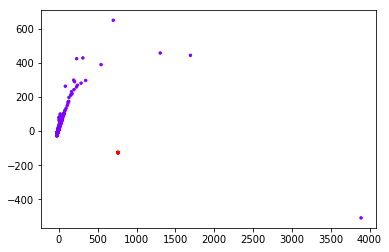

In [215]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=6,c=labels, cmap='rainbow')

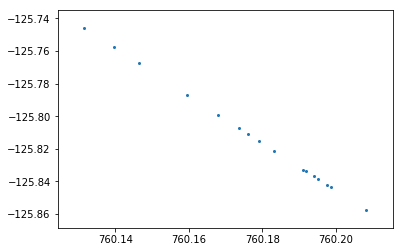

In [216]:
plt.scatter(X_transformed[labels==3,:][:,0], X_transformed[labels==3,:][:,1], s=4, cmap='rainbow')

In [183]:
labels=np.concatenate((np.ones(T1andFLAIRlistt.shape[0])*2,np.ones(T1andFLAIRlist_.shape[0])*3))


In [178]:
T1andFLAIRlist_.shape[0]

16

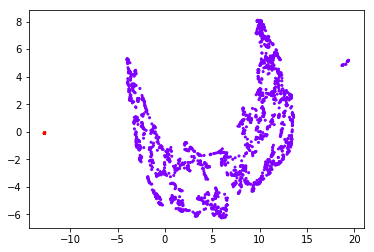

In [184]:
plt.scatter(reducer.embedding_[:,0], reducer.embedding_[:,1], s=4,c=labels, cmap='rainbow')

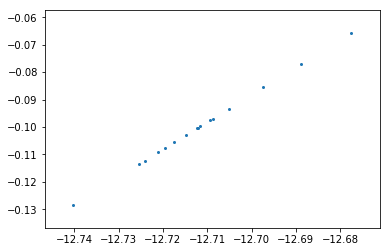

In [188]:
plt.scatter(reducer.embedding_[labels==3,:][:,0], reducer.embedding_[labels==3,:][:,1], s=4, cmap='rainbow')

In [207]:
reducer.embedding_[labels==3,:][:,0]

array([-12.697328 , -12.7115965, -12.721102 , -12.688811 , -12.725299 ,
       -12.677496 , -12.74024  , -12.717389 , -12.709294 , -12.712255 ,
       -12.71963  , -12.724144 , -12.705149 , -12.708651 , -12.712129 ,
       -12.714871 ], dtype=float32)

In [197]:
            MASK_img_ = nii.load("lib/MSSEG2016/mask_jobINTRUS.nii")
            MASK_ = MASK_img_.get_data()
            MASK_=MASK_.astype('int')
            
            MASK_img = nii.load("lib/MSSEG2016/mask_n_mfmni_f01016SACH_3DT1_check.nii.gz")
            MASK = MASK_img.get_data()
            MASK=MASK.astype('int')

In [199]:
            T1_img = nii.load("lib/MSSEG2016/n_mfmni_f01016SACH_3DT1_check.nii.gz")
            T1=T1_img.get_data()
            T1=T1.astype('float32')
            ind=np.where(MASK>0)
            indbg=np.where(MASK==0)
            T1[indbg] = 0
            
            T1_img_ = nii.load("lib/MSSEG2016/n_mfmni_jobINTRUST1.nii")
            T1_=T1_img_.get_data()
            T1_=T1_.astype('float32')
            ind_=np.where(MASK_>0)
            indbg_=np.where(MASK_==0)
            T1_[indbg_] = 0
            
            FLAIR_img = nii.load("lib/MSSEG2016/n_mfmni_f01016SACH_3DFLAIR_check.nii.gz")
            FLAIR=FLAIR_img.get_data()
            FLAIR=FLAIR.astype('float32')
            FLAIR[indbg] = 0
            
            FLAIR_img_ = nii.load("lib/MSSEG2016/n_mfmni_jobINTERUSFLAIR.nii")
            FLAIR_=FLAIR_img_.get_data()
            FLAIR_=FLAIR_.astype('float32')
            FLAIR_[indbg_] = 0

In [201]:
img = nii.Nifti1Image(T1-T1_, np.eye(4))
img.to_filename('diffT1m.nii.gz')

In [200]:
img = nii.Nifti1Image(FLAIR-FLAIR_, np.eye(4))
img.to_filename('diffFLAIRm.nii.gz')

In [202]:
img = nii.Nifti1Image(((MASK-MASK_)*255).astype('float32'), np.eye(4))
img.to_filename('diffMASK.nii.gz')

In [203]:
T1diff=T1-T1_            
m1=np.mean(T1diff)
s1=np.std(T1diff)
T1diff=(T1diff-m1)/s1

In [204]:
FLAIRdiff=FLAIR-FLAIR_            
m1=np.mean(FLAIRdiff)
s1=np.std(FLAIRdiff)
FLAIRdiff=(FLAIRdiff-m1)/s1

In [208]:
T1diff=T1-T1_            
minn=np.min(T1diff)
maxx=np.max(T1diff)
T1diff=(T1diff-minn)/(maxx-minn)

In [209]:
FLAIRdiff=FLAIR-FLAIR_            
minn=np.min(FLAIRdiff)
maxx=np.max(FLAIRdiff)
FLAIRdiff=(FLAIRdiff-minn)/(maxx-minn)

In [210]:
img = nii.Nifti1Image(T1diff, np.eye(4))
img.to_filename('diffT1normalisMinMax.nii.gz')

In [211]:
img = nii.Nifti1Image(FLAIRdiff, np.eye(4))
img.to_filename('diffFLAIRnormalisMinMax.nii.gz')